Bias Error
Bias are the simplifying assumptions made by a model to make the target function easier to learn.

Generally, linear algorithms have a high bias making them fast to learn and easier to understand but generally less flexible. In turn, they have lower predictive performance on complex problems that fail to meet the simplifying assumptions of the algorithms bias.

Low Bias: Suggests less assumptions about the form of the target function.
High-Bias: Suggests more assumptions about the form of the target function.
Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.
    
Variance Error
Variance is the amount that the estimate of the target function will change if different training data was used.

The target function is estimated from the training data by a machine learning algorithm, so we should expect the algorithm to have some variance. Ideally, it should not change too much from one training dataset to the next, meaning that the algorithm is good at picking out the hidden underlying mapping between the inputs and the output variables.

Machine learning algorithms that have a high variance are strongly influenced by the specifics of the training data. This means that the specifics of the training have influences the number and types of parameters used to characterize the mapping function.

Low Variance: Suggests small changes to the estimate of the target function with changes to the training dataset.
High Variance: Suggests large changes to the estimate of the target function with changes to the training dataset.
Generally, nonlinear machine learning algorithms that have a lot of flexibility have a high variance. For example, decision trees have a high variance, that is even higher if the trees are not pruned before use.

Examples of low-variance machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

Examples of high-variance machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.   
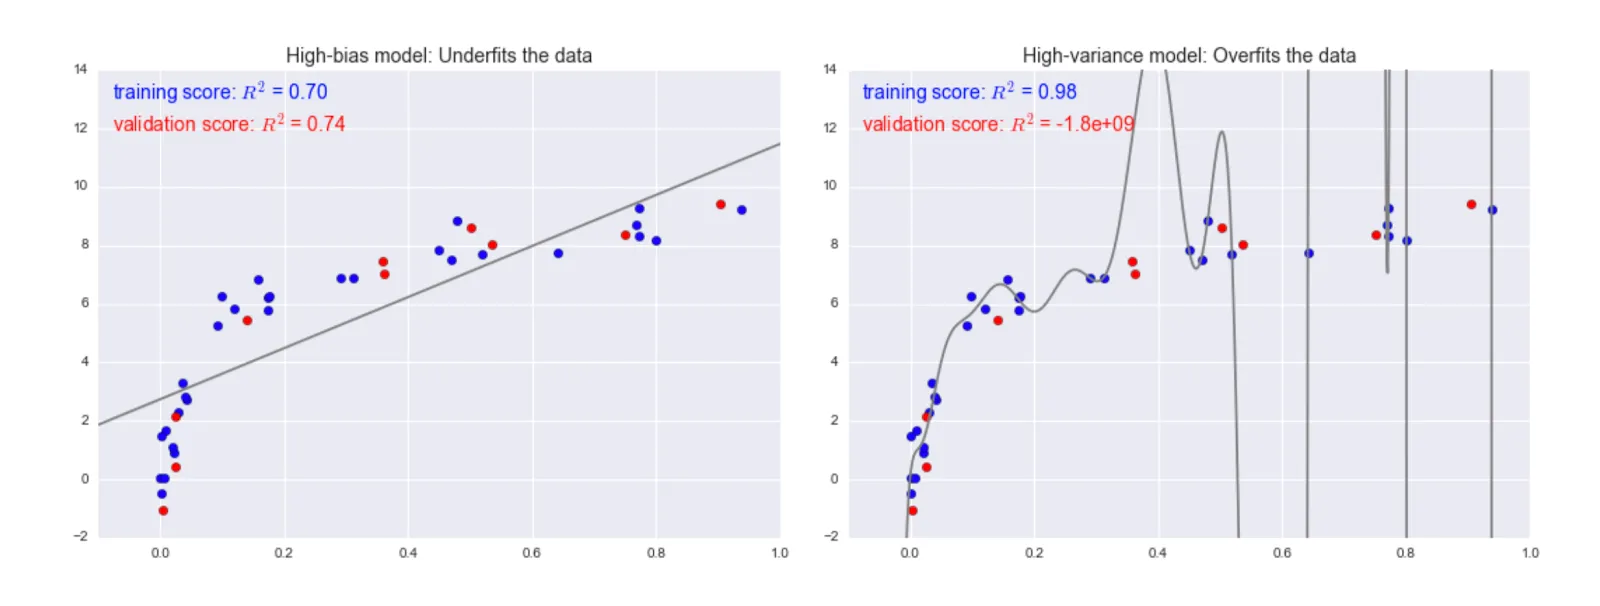
   

In [4]:
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 6)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

In [8]:
data_excel= pd.read_excel("Advertising.xlsx")
data_csv=pd.read_csv("Advertising.csv")

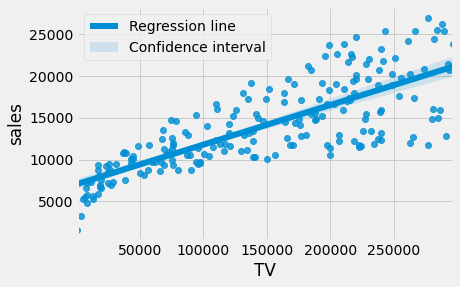

In [9]:
import seaborn as sns
ax = sns.regplot(data_csv["TV"],data_csv["sales"], line_kws={'label': 'Regression line'})
ax.collections[1].set_label('Confidence interval')
ax.legend()

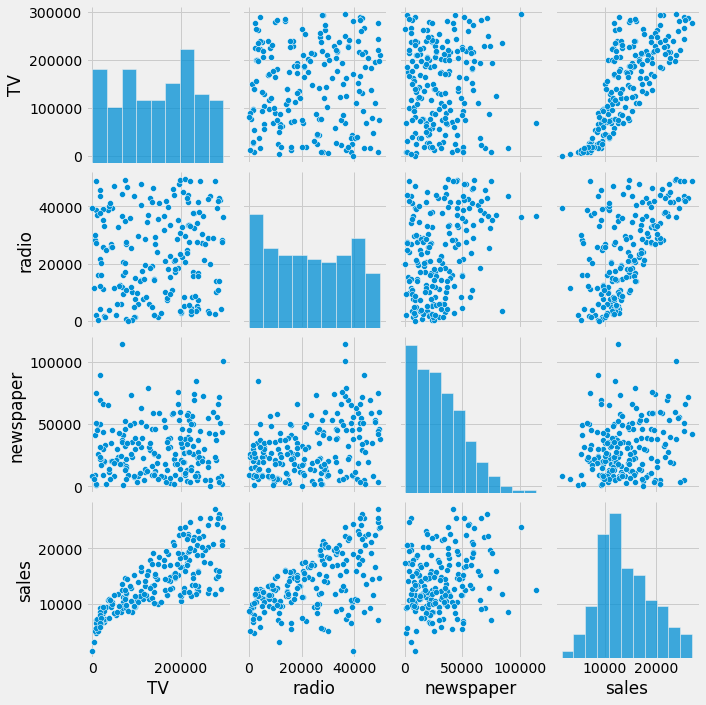

In [10]:
sns.pairplot(data_csv)

In [11]:
#Separating the x and y variables
x=data_csv[["TV"]] 
y=data_csv["sales"]

#split into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=101)

In [12]:
data_csv

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


Intercept:  7177.057802578854
Coefficient:  [0.04704165]
Coefficient: [0.04704165348588062]
R-Square: 0.6345141851817353 RMSE: 3212.2352689386476
[18001.34226968]


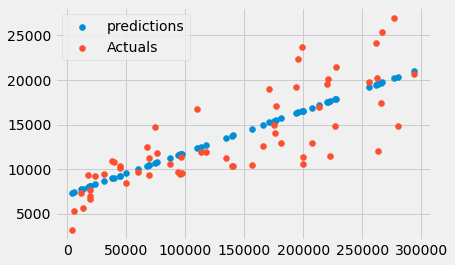

In [13]:
#*********************************************************************
#*********************************************************************
"""Simple linear regression"""
from sklearn.linear_model import LinearRegression #import regression model

lm = LinearRegression() #initialize the model
lm.fit(x_train,y_train) #fitting the model (or training it)
print ("Intercept: ", lm.intercept_)#this is the intercept 
print ("Coefficient: ", lm.coef_)#  the coefficient
print ("Coefficient:", lm.coef_.tolist())

predictions = lm.predict(x_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions) #the R -square score

#get the rmse score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,predictions))
print("R-Square:", r2, "RMSE:", rmse)

import matplotlib.pyplot as plt
plt.scatter(x_test,predictions,label="predictions")
plt.scatter(x_test,y_test,label="Actuals")
plt.legend()
print(lm.predict([[230100]]))

In [14]:
#*********************************************************************
"""Multiple linear regression"""

#Separating the x and y variables
X=data_csv[["TV","radio"]] 
Y=data_csv["sales"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=101)

Intercept:  3146.0500128802214
Coefficient:  [0.04468799 0.18742267]
Coefficient: [0.044687987701794885, 0.18742267422839456]
R-Square: 0.9185476109820699 RMSE: 1516.4356880183664


<AxesSubplot:xlabel='sales'>

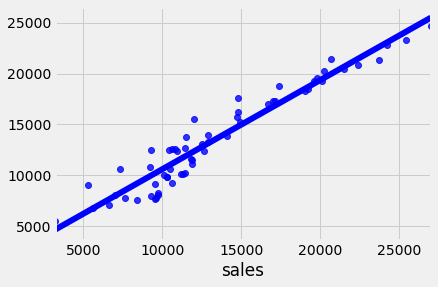

In [15]:
from sklearn.linear_model import LinearRegression #import regression model
lm = LinearRegression() #initialize the model
lm.fit(x_train,y_train) #fitting the model (or training it)

print ("Intercept: ", lm.intercept_)#this is the intercept 
print ("Coefficient: ", lm.coef_)#  the coefficient
print ("Coefficient:", lm.coef_.tolist())

predictions = lm.predict(x_test)

from sklearn.metrics import r2_score
r2=r2_score(y_test, predictions) #the R -square score
rmse=sqrt(mean_squared_error(y_test,predictions))
print("R-Square:", r2, "RMSE:", rmse)

sns.regplot(x=y_test, y=predictions, ci=None, color="b")

A seaborn heatmap is a data visualization technique used to represent data in a tabular format as a color-coded matrix. Heatmaps are particularly useful for visualizing the relationships between two categorical variables or for displaying the correlation between numerical variables in a dataset. Seaborn, a Python data visualization library built on top of Matplotlib, provides a convenient function called sns.heatmap() for creating heatmaps.

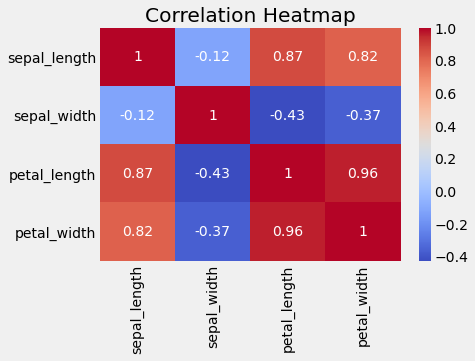

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a dataset (e.g., a Pandas DataFrame)
data = sns.load_dataset("iris")

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


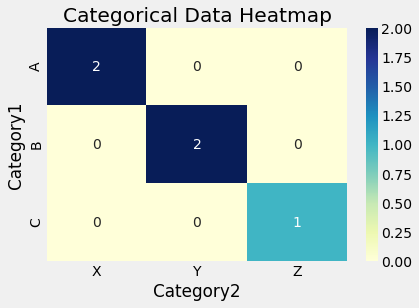

In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataset
data = pd.DataFrame({'Category1': ['A', 'B', 'A', 'C', 'B'],
                     'Category2': ['X', 'Y', 'X', 'Z', 'Y']})

# Create a cross-tabulation of the two categorical variables
crosstab = pd.crosstab(data['Category1'], data['Category2'])

# Create a heatmap of the cross-tabulation
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")
plt.title("Categorical Data Heatmap")
plt.show()


A missing value heatmap is a helpful visualization to identify and visualize missing values in a dataset. Seaborn provides a convenient way to create a missing value heatmap using the sns.heatmap() function.

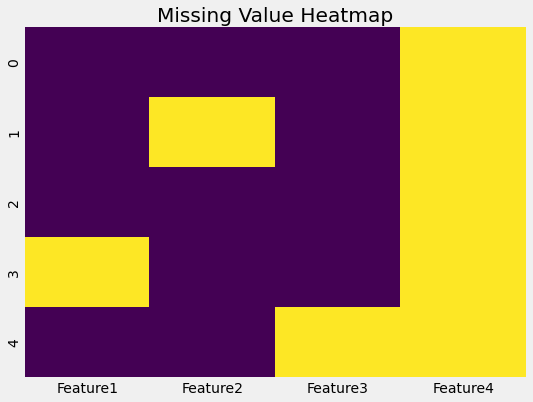

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample dataset with missing values
data = pd.DataFrame({
    'Feature1': [1, 2, 3, np.nan, 5],
    'Feature2': [6, np.nan, 8, 9, 10],
    'Feature3': [11, 12, 13, 14, np.nan],
    'Feature4': [np.nan, np.nan, np.nan, np.nan, np.nan]
})

# Create a missing value heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Value Heatmap')
plt.show()



In [42]:
import pandas as pd
df=pd.read_csv(r"C:/Babu/PhD/Adjunct_Faculty\NorthEastern/MISM 6212 Data Mining and Machine Learning/Week3_Linear_Regression/AmesHousing.csv")

##Goal is to make a model to predict Sales price of the house
##visualize
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

<AxesSubplot:>

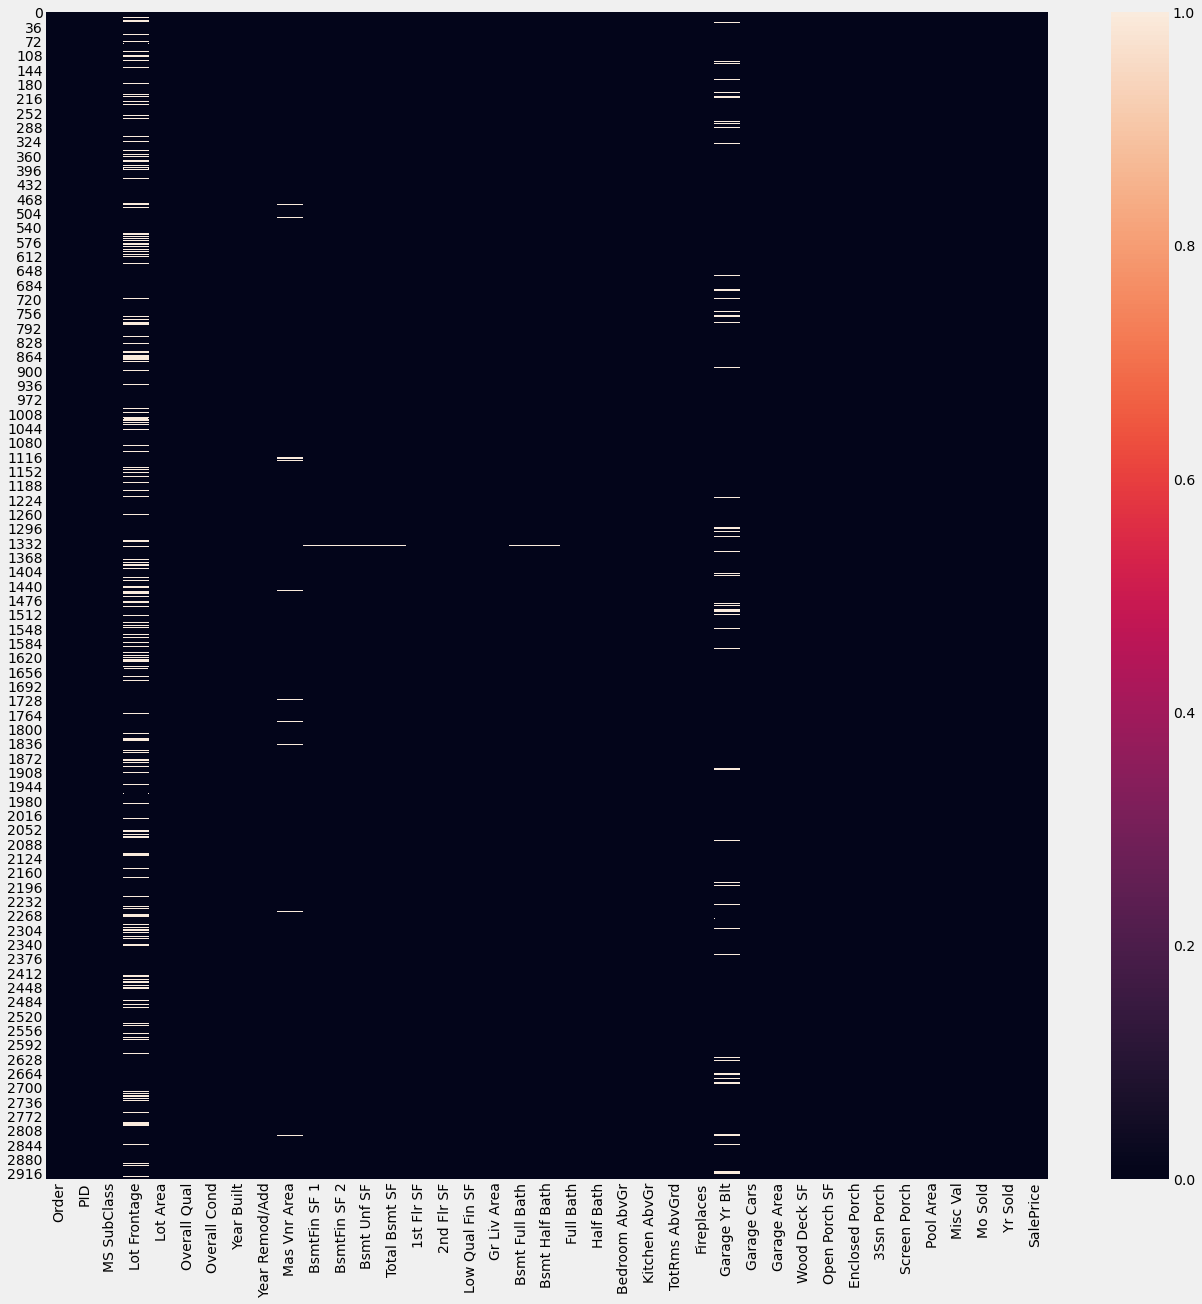

In [43]:
##one way to get an idea of missing values is to generate a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull()) ##to visualize the missing values
#df.isnull().sum()

In [19]:
##get rid of the id columns
df=df.drop(["Order", "PID"], axis=1)

In [20]:
###missing values
df=df.dropna()

MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

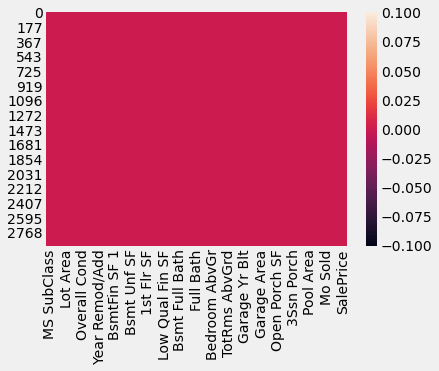

In [23]:
sns.heatmap(df.isnull()) 
#df.isnull().sum()

In [24]:
##Now that the data is clean.
##Let's make a regression model
##tset size of 0.3, random state= 1
##r2 and rmse
##seperate x and y variables
x=df.drop("SalePrice", axis=1)
y=df["SalePrice"]

##split into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.3, random_state=1)

##liner regression model(import, initialize, train, make predictions)

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)

predictions=lm.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
r_2=r2_score(y_test, predictions)

mse=mean_squared_error(y_test,predictions)
rmse=mse**0.5
print ("RMSE is",rmse) ##
print("R2 is", r_2) ##

'''Now we want to do feature selection using selectkbest to hopefully imporve oour model'''
''' selectkbest: selects the best k features / x variables'''

##import, initialized it, train, transform the data
from sklearn.feature_selection import SelectKBest, f_regression
for i in range(1,37):    
    bestfeatures=SelectKBest(score_func=f_regression,k=i)
    bestfeatures.fit(x_train,y_train)
    # to extract data from a source, convert it into a usable format
    new_x_train=bestfeatures.transform(x_train)
    new_x_test=bestfeatures.transform(x_test)
    
    ##build a model using new_x_train
    ##test it on new_x_test
    ##can you get rmse and r2 with the new transformed data        
    lm=LinearRegression()
    lm.fit(new_x_train, y_train)
        
    predictions=lm.predict(new_x_test)
    
    from sklearn.metrics import r2_score, mean_squared_error
    r_2=r2_score(y_test, predictions)
        
    mse=mean_squared_error(y_test,predictions)
    rmse=mse**0.5
    print("the number of variables are",i)
    print ("new rmse is",rmse)
    print("new r2 is", r_2)
       
##Using all variables

### So choosing 29 variables from 36 variables, our model works better

RMSE is 31796.36504263619
R2 is 0.8451202107848658
the number of variables are 1
new rmse is 47003.54967076622
new r2 is 0.6615448601515037
the number of variables are 2
new rmse is 38804.622072685575
new r2 is 0.7693217136628454
the number of variables are 3
new rmse is 37913.18959029005
new r2 is 0.7797984125421585
the number of variables are 4
new rmse is 36905.0806422825
new r2 is 0.7913530130090717
the number of variables are 5
new rmse is 34769.93361932458
new r2 is 0.8147972106285197
the number of variables are 6
new rmse is 34828.36962548556
new r2 is 0.8141741662549935
the number of variables are 7
new rmse is 33927.109734212354
new r2 is 0.8236670280626259
the number of variables are 8
new rmse is 33840.48042014641
new r2 is 0.8245663738777762
the number of variables are 9
new rmse is 33872.54421670256
new r2 is 0.8242337702682317
the number of variables are 10
new rmse is 33491.110687459804
new r2 is 0.8281700350894964
the number of variables are 11
new rmse is 33463.5346416

In [27]:
add = lambda x, y: x + y
result = add(3, 5)  # result will be 8
print(result)

8


In [29]:
data = [{'name': 'Alice', 'age': 30}, {'name': 'Bob', 'age': 25}, {'name': 'Charlie', 'age': 35}]
sorted_data = sorted(data, key=lambda x: x['age'])
print(sorted_data)

[{'name': 'Bob', 'age': 25}, {'name': 'Alice', 'age': 30}, {'name': 'Charlie', 'age': 35}]


In [30]:
# DUMMY Variables
import pandas as pd
import numpy as np
np.random.seed(1)
data3 = pd.DataFrame({"C" : np.random.randint(low=1, high=100, size=100),
                     "D"  : np.random.normal(0.0, 1.0, size=100)
                     })
data3.to_csv(r"C:/Babu/PhD/Adjunct_Faculty\NorthEastern/MISM 6212 Data Mining and Machine Learning/Week3_Linear_Regression/dummy_data1.csv")

In [32]:
import pandas as pd
df=pd.read_csv(r"C:/Babu/PhD/Adjunct_Faculty/NorthEastern/MISM 6212 Data Mining and Machine Learning/Week3_Linear_Regression/dummy_data1.csv", usecols=lambda c: not c.startswith('Unnamed:'))

##categorial variables
##dummy variables: 0s and 1s

###dumify the data
df_dummy=pd.get_dummies(df, drop_first=True)
df
##avoid the dummy variable trap

##can you run a linear regression to predict salary
##use the test size of 0.3 and random_state of 1

#rmse and r2??

######################Regression ########################

#1: seperate x and y variables

x=df_dummy.drop("C", axis=1)
y=df_dummy["C"]

##2: Split into training and testing data
## x is split into x_train and x_test
##y is split into y_train and y_test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

###regression model now
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

####evaluate the model

y_pred=model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5

print(mse, rmse)
####*************************************************************************************

'''evaluate the model on the training data'''

y_pred_train=model.predict(x_train) ### these are predicted values

r2_score(y_train, y_pred_train)

mse=mean_squared_error(y_train, y_pred_train)
rmse=mse**0.5
print(mse, rmse)

####make predictions
model.predict([[1.55]])


847.4861695253726 29.111615714785955
877.2614408566685 29.618599576223527


array([42.37935522])

In [33]:
import pandas as pd
data_csv=pd.read_csv(r"C:/Babu/PhD/Adjunct_Faculty/NorthEastern/MISM 6212 Data Mining and Machine Learning/Week3_Linear_Regression/shark_attacks.csv")
data_csv.corr()
x=data_csv[["IceCreamSales"]] 
y=data_csv["SharkAttacks"]

#split into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=5)

#*********************************************************************
#*********************************************************************
"""Simple linear regression"""

from sklearn.linear_model import LinearRegression #import regression model
lm = LinearRegression() #initialize the model
lm.fit(x_train,y_train) #fitting the model (or training it)

print ("Intercept: ", lm.intercept_)#this is the intercept 
print ("Coefficient: ", lm.coef_)#  the coefficient
print ("Coefficient:", lm.coef_.tolist())

predictions = lm.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, predictions)) #the R -square score
from sklearn.metrics import r2_score

r2 = (r2_score(y_test, predictions)) #the R -square score
print ("R-Square",r2)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,predictions))
print ("RMSE",rmse)




Intercept:  7.317310654232621
Coefficient:  [0.29901066]
Coefficient: [0.2990106575023276]
0.3275535586886448
R-Square 0.3275535586886448
RMSE 7.74621894655463


In [34]:
#adding the extra variable
#,"IceCreamSales"
x=data_csv[["Temperature","IceCreamSales"]] 
y=data_csv["SharkAttacks"]

#split into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=1)

In [35]:
#*********************************************************************
#*********************************************************************
"""Multi linear regression"""

from sklearn.linear_model import LinearRegression #import regression model
lm = LinearRegression() #initialize the model
lm.fit(x_train,y_train) #fitting the model (or training it)

print ("Intercept: ", lm.intercept_)#this is the intercept 
print ("Coefficient: ", lm.coef_)#  the coefficient
print ("Coefficient:", lm.coef_.tolist())

predictions = lm.predict(x_test)


from sklearn.metrics import r2_score
r2 = (r2_score(y_test, predictions)) #the R -square score
print ("R-Square",r2)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,predictions))
print ("RMSE",rmse)



Intercept:  -6.084596588256915
Coefficient:  [1.29905347 0.17946881]
Coefficient: [1.2990534714666606, 0.17946881394577827]
R-Square 0.30918338337333306
RMSE 6.371795906949919
